In [1]:
import sklearn
print(sklearn. __version__)

1.3.0


In [1]:
# importing the data
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('survey_results_public.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [2]:
# alot of columns here but we need only these
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df.head()

,Country,EdLevel,YearsCodePro,Employment,ConvertedCompYearly
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


In [3]:
# renaming to Salary
df = df.rename({"ConvertedCompYearly":"Salary"},axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


In [4]:
# checking null values
df.isnull().sum()

Country          1211
EdLevel          1211
YearsCodePro    23048
Employment       1286
Salary          41165
dtype: int64

In [5]:
# getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       87973 non-null  object 
 1   EdLevel       87973 non-null  object 
 2   YearsCodePro  66136 non-null  object 
 3   Employment    87898 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.4+ MB


In [6]:
# drop salary null values
df = df[df['Salary'].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   YearsCodePro  47825 non-null  object 
 3   Employment    48007 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [8]:
# now drop all the null values
df.isnull().sum()

Country           0
EdLevel           0
YearsCodePro    194
Employment       12
Salary            0
dtype: int64

In [9]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [10]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [11]:
# dropping employment column 
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47813 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       47813 non-null  object 
 1   EdLevel       47813 non-null  object 
 2   YearsCodePro  47813 non-null  object 
 3   Salary        47813 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.8+ MB


In [12]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,96828.0


In [13]:
# value counts of country
df['Country'].value_counts()

Country
United States of America                                11846
Germany                                                  3947
United Kingdom of Great Britain and Northern Ireland     3521
Canada                                                   2095
India                                                    1849
                                                        ...  
Guinea-Bissau                                               1
Mauritania                                                  1
Botswana                                                    1
Guyana                                                      1
Antigua and Barbuda                                         1
Name: count, Length: 171, dtype: int64

In [14]:
# now shorten the category and add the least country to others

def shorten_category(categories,cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [15]:
country_map = shorten_category(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
United States of America                                11846
Other                                                    8307
Germany                                                  3947
United Kingdom of Great Britain and Northern Ireland     3521
Canada                                                   2095
India                                                    1849
France                                                   1793
Netherlands                                              1359
Poland                                                   1265
Brazil                                                   1249
Australia                                                1206
Spain                                                    1142
Sweden                                                   1055
Italy                                                    1009
Switzerland                                               659
Austria                                                   531


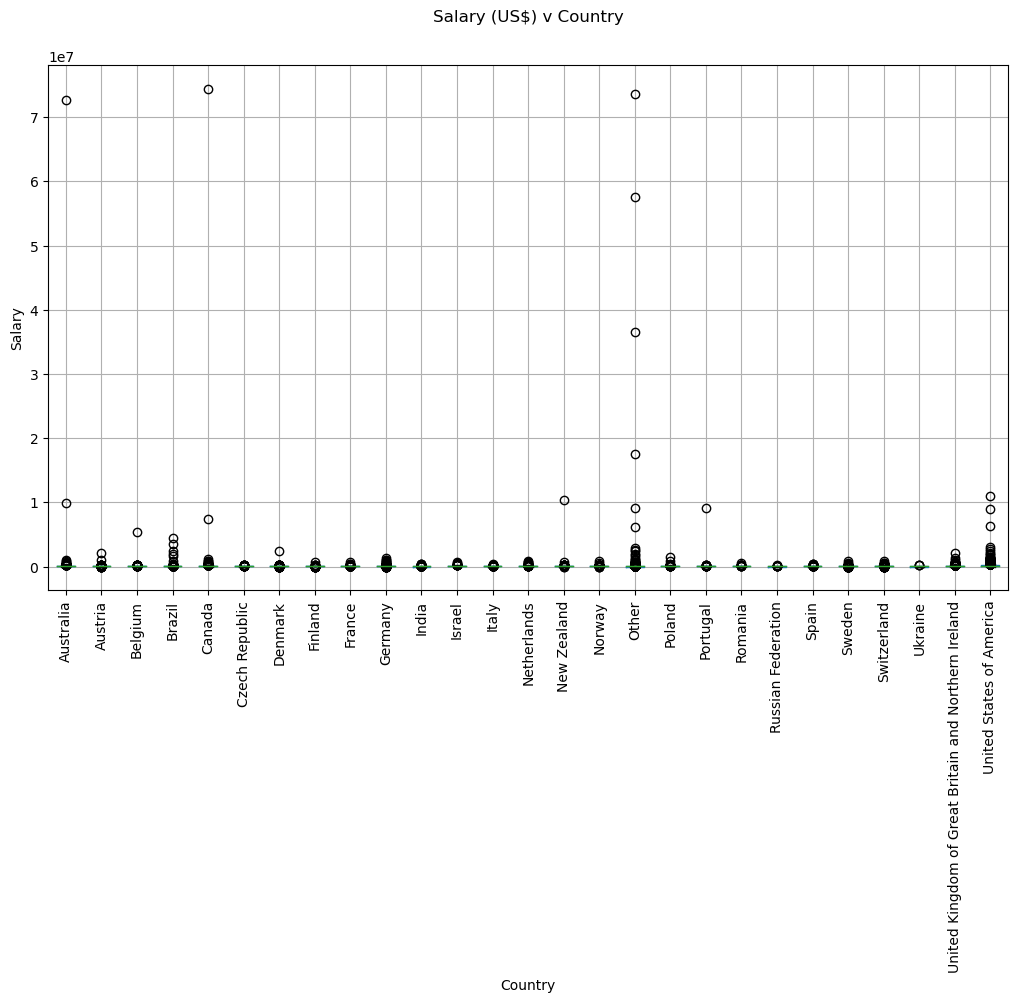

In [16]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [17]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

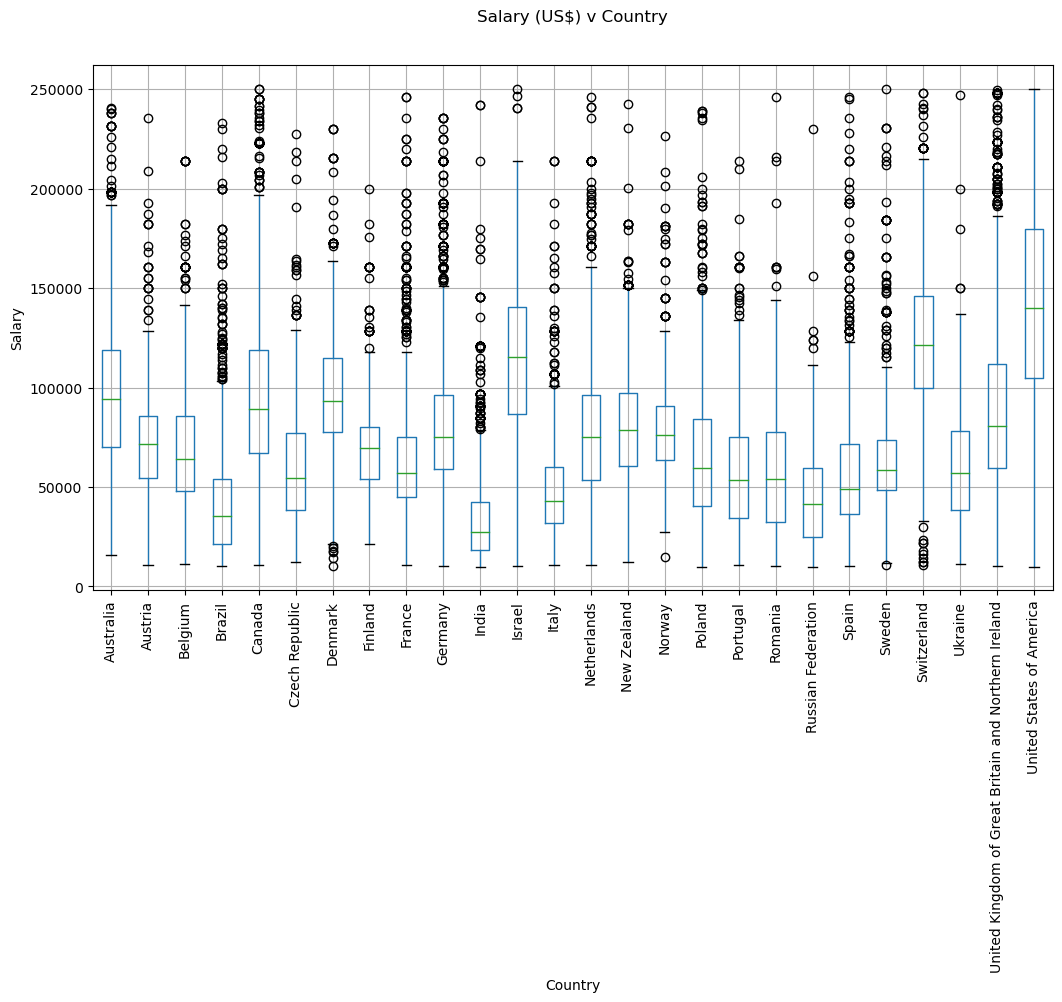

In [18]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [19]:
# cleaning experience column
df["YearsCodePro"].unique()

array(['23', '7', '21', '3', '15', '9', 'Less than 1 year', '10', '2',
       '6', '14', '5', '19', '13', '16', '28', '30', '24', '40', '4',
       '25', '12', '20', '11', '8', '18', '50', '27', '17', '43', '26',
       '38', '33', '29', '22', '1', '31', '34', '37', '42',
       'More than 50 years', '36', '39', '35', '41', '32', '44', '48',
       '45', '46', '47', '49'], dtype=object)

In [20]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [21]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23.0,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7.0,156000.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21.0,96828.0
6,United States of America,Some college/university study without earning ...,3.0,135000.0
7,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3.0,80000.0


In [22]:
# cleaning educational level

df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [23]:
def clean_education(x):
    if "Bachelor’s degree" in x:
        return "Bachelor's degree"
    if "Master’s degree" in x:
        return "Master's degree"
    if "Professional degree" in x:
        return "Post grad"
    return "Less than a Bachelor's"

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [24]:
df["EdLevel"].unique()

array(["Bachelor's degree", "Less than a Bachelor's", "Master's degree",
       'Post grad'], dtype=object)

In [25]:
# now converting the country and edlevel to numeric values

from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([0, 1, 2, 3])

In [26]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([25, 24,  7,  0, 13,  9, 21,  8, 20,  3, 17, 12,  4, 22, 10,  1, 15,
       19, 16,  2,  6, 11, 23,  5, 18, 14])

In [27]:
# now splitting data to input and output
X = df.drop('Salary',axis=1)
y = df['Salary']

## Regressor Problem

In [28]:
# Training with Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y.values)

LinearRegression()

In [29]:
y_pred = lr.predict(X)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

error = np.sqrt(mean_squared_error(y,y_pred))

In [31]:
error

46552.172932295805

In [32]:
# Training with Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X,y.values)

DecisionTreeRegressor()

In [33]:
y_pred = dt.predict(X)

In [36]:
error = np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$34,551.31


In [37]:
# Training with Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X,y.values)

RandomForestRegressor()

In [38]:
y_pred = rf.predict(X)

In [39]:
error = np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$34,635.44


In [40]:
# now finding the best params using GridSearchCV

from sklearn.model_selection import GridSearchCV

max_depth = [None,2,4,6,8,10,12]
parameters = {'max_depth':max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor,parameters,scoring='neg_mean_squared_error')
gs.fit(X,y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [42]:
regressor = gs.best_estimator_
regressor

DecisionTreeRegressor(max_depth=10, random_state=0)

In [43]:
regressor.fit(X,y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$35,985.58


In [44]:
X

,Country,EdLevel,YearsCodePro
2,25,0,23.0
3,25,0,7.0
5,24,1,21.0
6,25,1,3.0
7,25,0,3.0
...,...,...,...
89156,25,0,8.0
89158,21,0,8.0
89162,3,2,24.0
89167,10,0,2.0


In [50]:
# country, edlevel, yearscode
z = np.array([["United States of America", "Master's degree", 15 ]])
z

array([['United States of America', "Master's degree", '15']],
      dtype='<U24')

In [51]:
z[:, 0] = le_country.transform(z[:,0])
z[:, 1] = le_education.transform(z[:,1])
z = z.astype(float)
z

array([[25.,  2., 15.]])

In [53]:
y_pred = regressor.predict(z)
y_pred

C:\Users\n\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([170006.77057357])

# importing our model

In [55]:
import pickle

data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [56]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [58]:
y_pred = regressor_loaded.predict(z)
y_pred

C:\Users\n\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([170006.77057357])